In [2]:
# Input data csv and check data
import pandas as pd
import numpy as np
book = pd.read_csv(r"C:\Users\ASUS\Downloads\book.csv")
book.head(4)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10320\3174680248.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv(r"C:\Users\ASUS\Downloads\book.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [3]:
user = pd.read_csv(r"C:\Users\ASUS\Downloads\user.csv")
user.head(4)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0


In [4]:
rating = pd.read_csv(r"C:\Users\ASUS\Downloads\rating.csv").sample(35000)
rating.head(4)

,User-ID,ISBN,Book-Rating
114369,26535,0373240880,0
455885,109574,0721641318,10
580155,139742,0676972853,0
247518,56447,1555971687,0


In [5]:
print('Book :',book.shape)
print('User :',user.shape)
print('Rating :',rating.shape)
print('null value in Book :',book.isnull().sum())
print('null value in User :',user.isnull().sum())
print('null value in Rating:',rating.isnull().sum())

Book : (271360, 8)
User : (278858, 3)
Rating : (35000, 3)
null value in Book : ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
null value in User : User-ID          0
Location         0
Age         110762
dtype: int64
null value in Rating: User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [6]:
# PreProcessing Value 
Urate = rating.merge(user,left_on='User-ID',right_on='User-ID')
Urate.head(3)

,User-ID,ISBN,Book-Rating,Location,Age
0,26535,0373240880,0,"hickory, mississippi, usa",41.0
1,26535,0843943629,5,"hickory, mississippi, usa",41.0
2,26535,0451211286,0,"hickory, mississippi, usa",41.0


In [7]:
books =book.merge(Urate, on='ISBN')
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",NaN
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,153461,0,"upland, california, usa",NaN
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,136509,0,"santa barbara, california, usa",31.0


In [8]:
import re
book_urate = books[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating','Publisher']]
book_urate.dropna(inplace=True)
book_urate.reset_index(drop=True, inplace = True)
book_urate.drop(index=book_urate[book_urate["Book-Rating"]==0].index,inplace=True)
book_urate["Book-Title"]=book_urate["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
book_urate.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10320\2198884375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_urate.dropna(inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10320\2198884375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_urate.drop(index=book_urate[book_urate["Book-Rating"]==0].index,inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10320\2198884375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,Publisher
0,0399135782,The Kitchen God s Wife,Amy Tan,11676,9,Putnam Pub Group
3,074322678X,Where You ll Find Me And Other Stories,Ann Beattie,8,5,Scribner
9,0440234743,The Testament,John Grisham,9419,5,Dell
10,0440234743,The Testament,John Grisham,223331,7,Dell
11,0440234743,The Testament,John Grisham,207825,7,Dell


In [9]:
# Drop duplicated data 
BOOK = book_urate.drop_duplicates(keep='first')
print("After drop duplicated data")
BOOK.shape

After drop duplicated data


(11633, 6)

In [10]:
# Checking Missing Value
BOOK.isna().sum()

ISBN           0
Book-Title     0
Book-Author    0
User-ID        0
Book-Rating    0
Publisher      0
dtype: int64

F:\anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Book-Rating', ylabel='Count'>

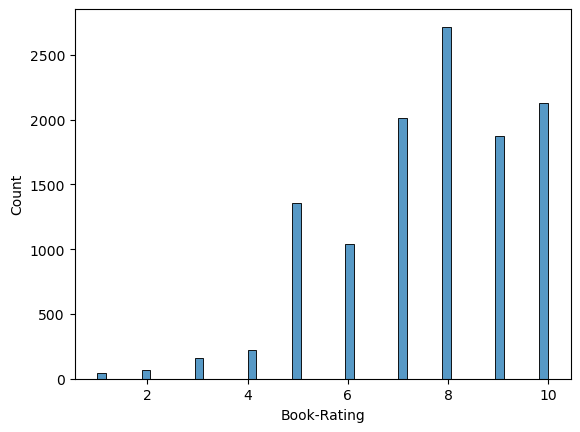

In [11]:
# Visualisasi data 
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(BOOK['Book-Rating'])

<Axes: xlabel='Book-Rating'>

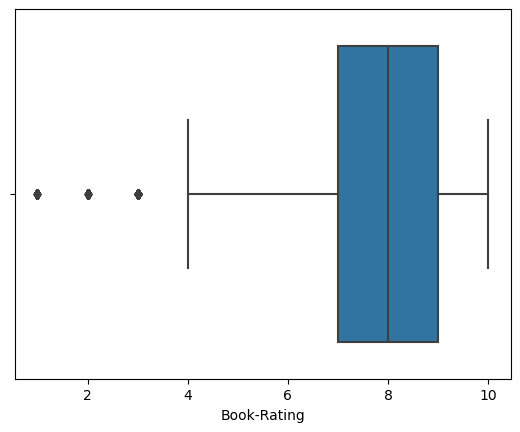

In [12]:
# Check outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=BOOK['Book-Rating'])

In [13]:
# SPlitting Data 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(BOOK, test_size=0.3, random_state=42)

In [14]:
# Popularity Based Recommendation System 
def popular_bookstrain(train_data, n=1000):
    Jumlah_rating = train_data.groupby("Book-Title").count()["Book-Rating"].reset_index()
    Jumlah_rating.rename(columns={"Book-Rating": "VOTES"}, inplace=True)
    
    rating_average = train_data.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_average.rename(columns={"Book-Rating": "AverageRatings"}, inplace=True)
    
    Popular = Jumlah_rating.merge(rating_average, on="Book-Title")
    
    def weighted_rate(x):
        v = x["VOTES"]
        R = x["AverageRatings"]
        return ((v * R) + (m * C)) / (v + m)
    
    C = Popular["AverageRatings"].mean()
    m = Popular["VOTES"].quantile(0.95)
    
    Popular = Popular[Popular["VOTES"] >= 10]
    Popular["Popularity"] = Popular.apply(weighted_rate, axis=1)
    Popular = Popular.sort_values(by="Popularity", ascending=False)
    
    return Popular[["Book-Title", "VOTES", "AverageRatings", "Popularity"]].reset_index(drop=True).head(n)
# Popularity with train data
popularBook_train =popular_bookstrain(train_data, n=50)
print("Rekomendasi Buku Populer untuk Data Train:")
print(popularBook_train)


Rekomendasi Buku Populer untuk Data Train:
                               Book-Title  VOTES  AverageRatings  Popularity
0                              Life of Pi     12        8.583333    8.441380
1                       The Da Vinci Code     14        8.285714    8.198707
2                The Lovely Bones A Novel     12        8.250000    8.155665
3                       Angels amp Demons     11        8.000000    7.936870
4                         A Painted House     12        7.750000    7.727094
5                   House of Sand and Fog     10        7.300000    7.348276
6  The Girls Guide to Hunting and Fishing     10        6.000000    6.264943
7                             Wild Animus     17        4.705882    5.009438


In [17]:
# Popularity Based Recommendation System 
def popular_bookstest(test_data, n=1000):
    Jumlah_rating = test_data.groupby("Book-Title").count()["Book-Rating"].reset_index()
    Jumlah_rating.rename(columns={"Book-Rating": "VOTES"}, inplace=True)
    
    rating_average = test_data.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_average.rename(columns={"Book-Rating": "AverageRatings"}, inplace=True)
    
    Popular = Jumlah_rating.merge(rating_average, on="Book-Title")
    
    def weighted_rate(x):
        v = x["VOTES"]
        R = x["AverageRatings"]
        return ((v * R) + (m * C)) / (v + m)
    
    C = Popular["AverageRatings"].mean()
    m = Popular["VOTES"].quantile(0.95)
    
    Popular = Popular[Popular["VOTES"] >= 5]
    Popular["Popularity"] = Popular.apply(weighted_rate, axis=1)
    Popular = Popular.sort_values(by="Popularity", ascending=False)
    
    return Popular[["Book-Title", "VOTES", "AverageRatings", "Popularity"]].reset_index(drop=True).head(n)

# Menghasilkan rekomendasi buku paling populer untuk data uji
popularBook_test = popular_bookstest(test_data, n=10)
print("Rekomendasi Buku Populer untuk Data Test:")
print(popularBook_test)

Rekomendasi Buku Populer untuk Data Test:
                                      Book-Title  VOTES  AverageRatings  \
0                       The Lovely Bones A Novel      7        8.857143   
1                        The Secret Life of Bees      6        8.833333   
2              The Red Tent Bestselling Backlist      5        8.200000   
3                          House of Sand and Fog      5        8.000000   
4                              The Da Vinci Code      9        7.888889   
5                      Girl with a Pearl Earring      5        7.800000   
6  She s Come Undone Oprah s Book Club Paperback      5        7.800000   
7                                    Wild Animus     11        4.545455   

   Popularity  
0    8.576109  
1    8.523122  
2    8.026426  
3    7.883568  
4    7.834998  
5    7.740711  
6    7.740711  
7    5.014229  


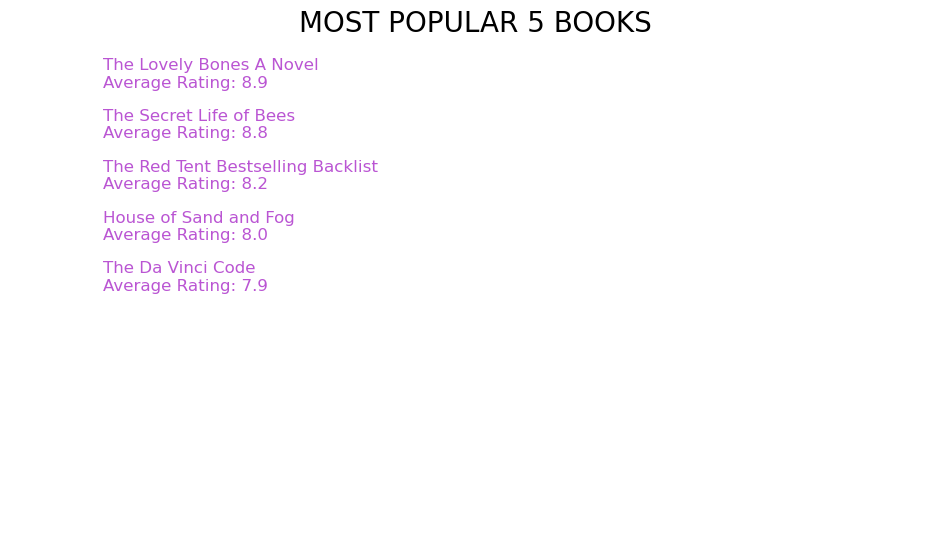

In [18]:
n = 5
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("MOST POPULAR 5 BOOKS", fontsize=20, color="black", pad=40)

# Loop untuk menambahkan judul buku ke plot
for i in range(n):
    book_title = popularBook_test.iloc[i]["Book-Title"]
    avg_rating = round(test_data[test_data["Book-Title"] == book_title]["Book-Rating"].mean(), 1)
    ax.text(0.1, 1 - i * 0.11, f"{book_title}\nAverage Rating: {avg_rating}", fontsize=12, color="mediumorchid")

# Mengatur axis dan tampilan
ax.axis("off")
plt.show()

In [25]:
# Evaluation Model
import pandas as pd

# Definisi fungsi novelty
def novelty(top_three, popularBook_test):
    novelty_score = 0
    count = 0

    # Iterasi melalui daftar top_three
    for book_title in top_three:
        # Periksa apakah judul buku tidak ada di dalam kolom "Book-Title" dari popularBook_test
        if book_title not in popularBook_test["Book-Title"].values:
            novelty_score += 1
            count += 1

    # Hitung rata-rata novelty_score jika ada buku yang tidak ditemukan
    if count > 0:
        novelty_score /= count

    return novelty_score

# Contoh data atau definisi popularBook_test (gunakan data sesuai kebutuhan Anda)
popularBook = popularBook_test

# Membuat DataFrame popularBook_test dari data contoh
Recomend = pd.DataFrame(popularBook)
top_three = Recomend["Book-Title"].tolist()

# Menghitung novelty score dengan memanggil fungsi novelty
novelty_score = novelty(top_three, Recomend)
print(f"Novelty Score: {novelty_score:.2f}")

Novelty Score: 0.00
